# Determine the Capacitance of an Unknown Electrolytic Capacitor

The charge in a capacitor is proportial to the voltage across the capacitor, aka capacitor voltage $V_C$ which is changing over time during charing or discharging:

$$
\begin{eqnarray}
Q(t) = CV_C(t) \\
\end{eqnarray}
$$

The quantities vary in time according to:

$$
\begin{eqnarray}
\dot{Q}(t) = C\dot{V}_C(t)
\end{eqnarray}
$$

The rate of change of the capacitor's charge is the current into or out of the capacitor. When the charge is depleting, i.e. $(\dot{Q}(t) < 0)$, the current is positive, i.e. $I>0$. This motivates the "$-$" in the following equation

$$
-\dot{Q}(t) = I(t)
$$



In the circuit is only one current $I$, since the is no junction. The current is the same everywhere.



## Discharging

When **discharging** a capacitor through a resistor, the discharge current is flowing out of the capacitor through the resistor yielding a voltage drop $V_R$ (aka resistor voltage) equal to the voltage across the capacitor since $R$ and $C$ are parallel:

$$
V_C(t) = V_R(t)
$$

Applying Ohm's law yields:

$$
V_R(t) = RI(t) 
$$

Combing the equations:

$$
V_C(t) = V_R(t) = RI(t) = -R\dot{Q}(t) = -RC\dot{V}_C(t)
$$

$$
\dot{V}_C(t) = -\frac{1}{RC}V_C(t)
$$

$$
\dot{V}_C(t) = \left(-\frac{1}{RC}\right)V_C(t)
$$

This shows that the time dependent function $V_C(t)$ is proportional to its own derivative $\dot{V}_C(t)$. This is called a differential equation:

$$
\dot{V}_C(t) \propto V_C(t)
$$


The task is to find a function $V_C(t)$ which fulfills this differential equation.
<br>
The starting point, aka initial condition, must be known in order to solve the equation uniquely.
<br>
The initial condition is the initial voltage of the charged capacitor, just before discharging is started:

$$
V_C(0) = V_0
$$

The final solution:

$$
V_C(t) = V_0e^{-\frac{t}{RC}}
$$

## Charging

To solve the charging problem it is easier to investigate the current first, instead of the voltages, and to derive the voltages from the current afterwards.

The constant source voltage $V_S$ is used to charge the capacitor. 

$$
V_S =  V_C(t) + V_R(t)
$$

Some extra knowledge about capacitors and the charge current is needed to solve the problem. When the capacitor is initially compeletely discharged no electric field exists in the capacitor, which also means that there is no voltage difference across the capacitor. While charging this capacitor voltage over time and couteracts the charging. After a long time the capacitor voltage becomes equal to the source voltage and the charing stops.

Final state: 

$$
V_C(t\rightarrow\infty) = V_S
$$

Initially the capacitor voltage is 0V and the resistor is exposed to the full source voltage. Thus the initial charge current is only determined by the current limiting resistor and the source voltage.
<br>
Initial condition: 

$$
V_C(0) = 0{\rm V} \Rightarrow I_C(0) = V_S/R
$$





$$
\dot{V}_C + \dot{V}_R = \dot{V}_S = 0
$$

$$
\frac{\dot{Q}(t)}{C} + R\dot{I}(t) = 0
$$

$$
\dot{I}(t) = -\frac{1}{RC}I(t)
$$

Solution for the current:

$$
I(t) = I_0e^{-\frac{t}{RC}} = \frac{V_S}{R}e^{-\frac{t}{RC}}
$$

Determine voltages from the current:

$$
V_C(t) = V_S - V_R(t) = V_S - RI(t)
$$

$$
V_C(t) = V_S - R\left(\frac{V_S}{R}e^{-\frac{t}{RC}}\right) = V_S\left(1-e^{-\frac{t}{RC}}\right)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R = 1e6 # 1 mega Ohm
C = 1e-6 # 1 micro Farad
V0 = VS = 5 # V

t_c = R*C # characteristic time constant

# times to evaluate the functions at
t = np.arange(0.,5.,0.001)

In [3]:
def V_discharge(t, V0=1.0, R=1.e6, C=1.e-6):
    V = V0*np.exp(-1/(R*C)*t)
    return(V)

In [4]:
def V_charge(t, VS=1.0, R=1.e6, C=1.e-6):
    V = VS*(1-np.exp(-1/(R*C)*t))
    return(V)

[]

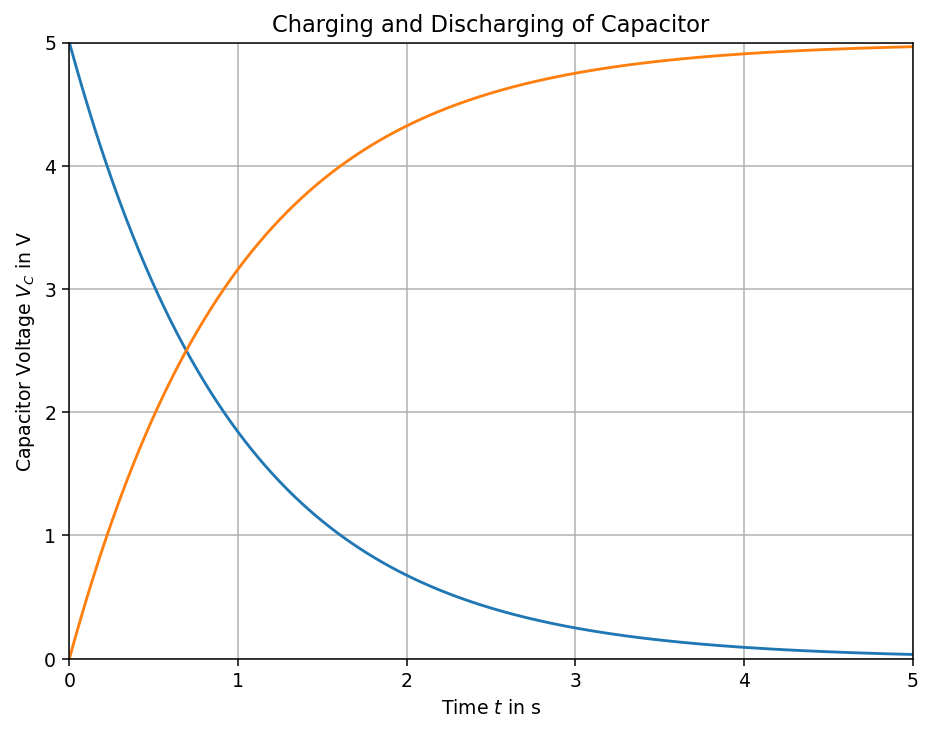

In [5]:
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=136)
ax1.plot(t,V_discharge(t,V0,R,C), label="discharging")
ax1.plot(t,V_charge(t,VS,R,C), label="charging")
ax1.set_xlabel("Time $t$ in s")
ax1.set_ylabel("Capacitor Voltage $V_C$ in V")
ax1.set_title("Charging and Discharging of Capacitor")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.grid(True)
plt.plot()

In [6]:
from ipywidgets import Dropdown

In [7]:
w = Dropdown(
    options=portnames,
    value=portnames[-1],
    description='Port:',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)

NameError: name 'portnames' is not defined